In [106]:
import warnings
warnings.filterwarnings('ignore')

In [107]:
import pandas as pd

In [108]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
import nltk.collocations as collocations
from nltk.util import ngrams
from nltk import FreqDist

In [110]:
df = pd.read_csv('../data/all-smi2smi.tsv', sep='\t')

In [111]:
df['len'] = df.smiles.apply(lambda x: len(x))

In [47]:
df

,smiles,smiles-out,len
0,n1c2c(c(O)cc1)cc(cc2)C,n1c2c(c(O)cc1)cc(cc2)C,22
1,Brc1ccc(cc1)C(OCCCO)CC,Brc1ccc(cc1)C(OCCCO)CC,22
2,C1(=O)C(=O)C(=C(C1=O)O)O,C1(=O)C(=O)C(=C(C1=O)O)O,24
3,c12c(c(CP(=O)(OCC)OCC)c3c(cccc3)c1)cccc2,c12c(c(CP(=O)(OCC)OCC)c3c(cccc3)c1)cccc2,40
4,O(P(=O)(OCC)Cc1cccc2c1cccc2)CC,O(P(=O)(OCC)Cc1cccc2c1cccc2)CC,30
...,...,...,...
14124,C1Cc2cc(ccc2NC1)C(=O)O,C1Cc2cc(ccc2NC1)C(=O)O,22
14125,CNCc1c2c(c(Br)s1)OCCO2,CNCc1c2c(c(Br)s1)OCCO2,22
14126,C1C2CC3(CC1CC(C2)(C3)O)C(=O)O,C1C2CC3(CC1CC(C2)(C3)O)C(=O)O,29
14127,c1cc2c(cc1Br)c(cc(Cl)n2)C(=O)Cl,c1cc2c(cc1Br)c(cc(Cl)n2)C(=O)Cl,31


In [11]:
df.describe()

,len
count,14129.000000
mean,43.211905
std,25.930148
min,5.000000
25%,23.000000
50%,36.000000
75%,59.000000
max,323.000000


In [14]:
corpus = []
for i, row in df.iterrows():
    smi = list(row['smiles'])
    corpus = corpus + smi

In [62]:
corpus[0:10]

['n', '1', 'c', '2', 'c', '(', 'c', '(', 'O', ')']

In [99]:
unigrams = ngrams(corpus,1)
uni_dist = FreqDist(unigrams).most_common(80)

In [100]:
bigrams = ngrams(corpus,2)
bi_dist = FreqDist(bigrams).most_common(80)

In [101]:
trigrams  = ngrams(corpus,3)
tri_dist = FreqDist(trigrams).most_common(80)

In [102]:
d_uni = pd.Series(dict(uni_dist))
d_bi  = pd.Series(dict(bi_dist))
d_tri = pd.Series(dict(tri_dist))

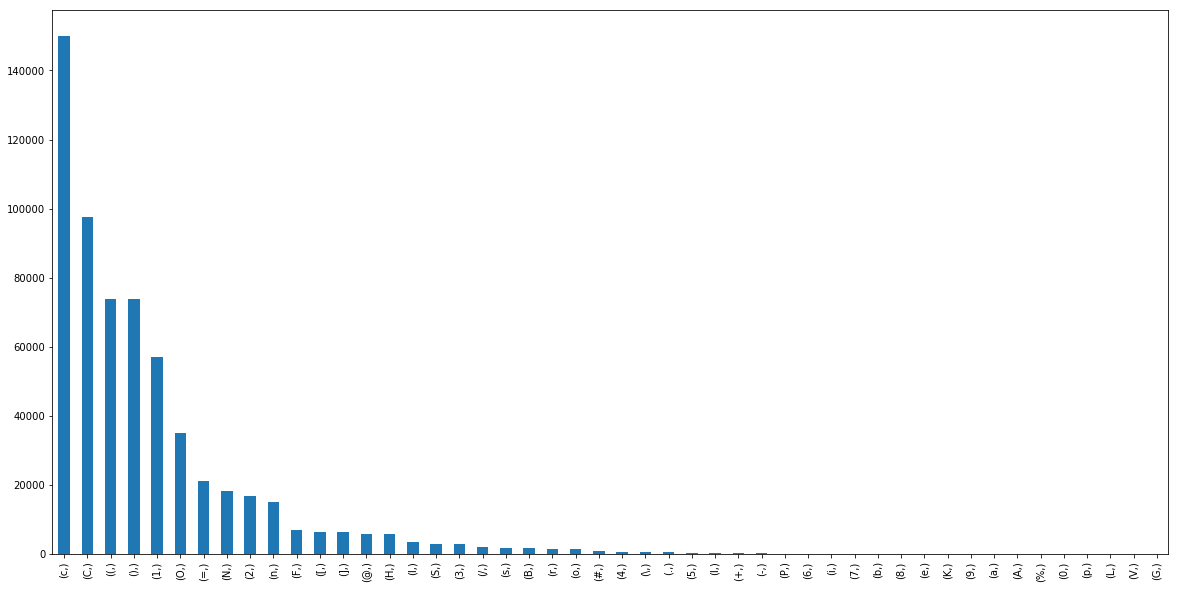

In [103]:
d_uni.plot(kind='bar', figsize=(20,10), rot=90)

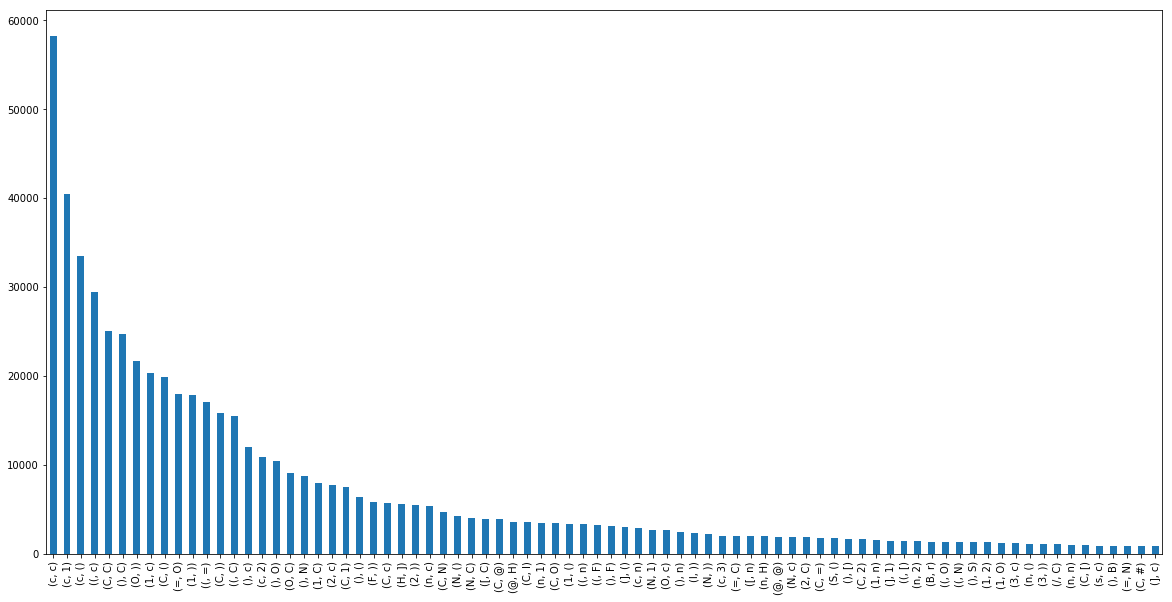

In [104]:
d_bi.plot(kind='bar', figsize=(20,10), rot=90)

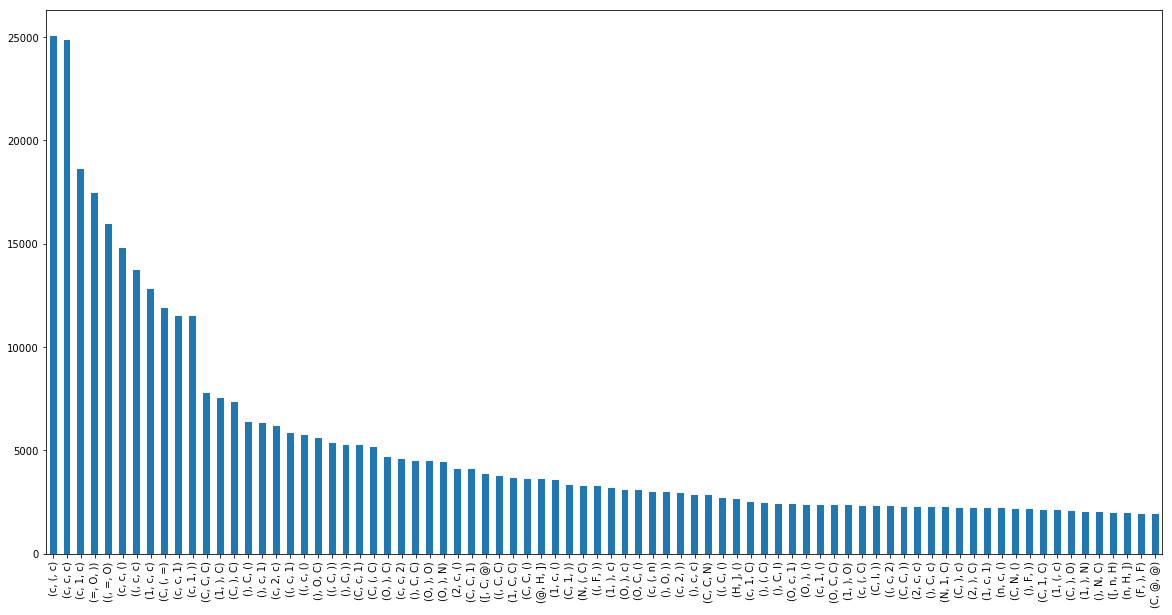

In [105]:
d_tri.plot(kind='bar', figsize=(20,10), rot=90)

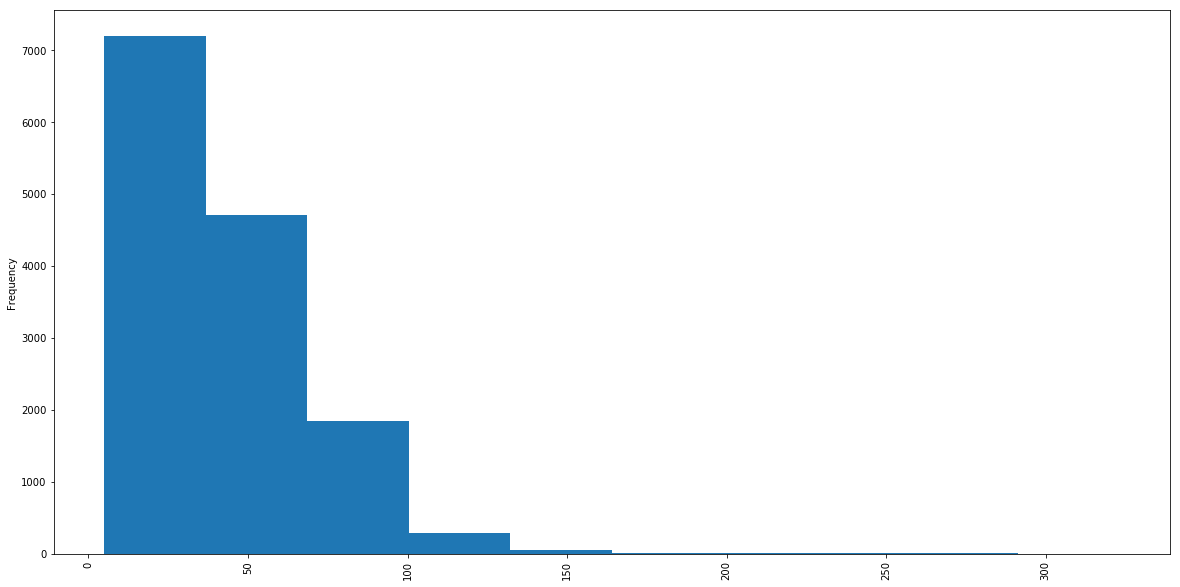

In [48]:
df.len.plot(kind='hist', figsize=(20,10), rot=90)